In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Next automatisation in US

Questions to analyse:

1. Which occupatios are the most sensitive and the most robust to automatisation (computerisation)?
2. See, how looks data distribution
3. What is the jobs loss in the US, if automatisation take out occupations with automatisation probability equal to 0.7 or higher?
4. Which US states are the most sensitive and the most robust to automatisation?
5. Compare most common occupations or automatisation


Specialybių automatizavimo Duomenu importavimas

# Sukelt paveikslelius i img folderi.
# Padaryt paveikslėliu braizymo ir kitas funkcijas def

In [2]:
Automation_data = "data/automation_data_by_state.csv"
A_data = pd.read_csv(Automation_data, encoding = "ISO-8859-1")
state_names = A_data.columns[3:]
A_data.head()
# A_data.isnull().sum() - patikrinau, kad stulpeliuose nėra null verčių.

,SOC,Occupation,Probability,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,11-1011,Chief Executives,0.015,1030,760,5750,2710,31150,880,1410,...,560,5460,5890,3650,280,6320,5910,980,3740,160
1,11-1021,General and Operations Managers,0.160,26930,6490,43300,20680,261780,41540,33280,...,3730,44400,168610,36200,2760,52380,43760,10200,32350,4840
2,11-2011,Advertising and Promotions Managers,0.039,50,40,470,110,3760,480,300,...,0,670,1210,380,40,240,640,40,200,0
3,11-2021,Marketing Managers,0.014,530,200,4790,1090,33390,3060,4970,...,60,3400,9570,2320,380,3840,5830,260,2980,30
4,11-2022,Sales Managers,0.013,2510,400,10650,2650,69180,4570,7040,...,300,8890,22310,3360,480,5360,7390,600,5730,180


Specialybiu uzdarbio Duomenu importavimas

In [3]:
salary_data = "data/occupation_salary.xlsx"
S_data = pd.read_excel(salary_data, index_col="OCC_CODE")
# S_data.shape
# S_data.isnull().sum() # tik ANNUAL, HOURLY stulpeliuose daug null reikšmių. Kituose stulpeliuose nėra.

Drop emty columns: ANNUAL, HOURLY

In [4]:
S_data_clean = S_data.drop(['ANNUAL', 'HOURLY'], axis=1)
S_data_clean

,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
OCC_CODE,,,,,,,,,,,,,,,,,
00-0000,All Occupations,total,140400040,0.1,23.86,49630,0.1,9.27,11.6,17.81,28.92,45.45,19290,24140,37040,60150,94540
11-0000,Management Occupations,major,7090790,0.2,56.74,118020,0.1,22.76,32.99,48.46,70.72,#,47330,68630,100790,147090,#
11-1000,Top Executives,minor,2465800,0.2,61.03,126950,0.2,20.58,31.45,49.19,78.35,#,42810,65420,102320,162970,#
11-1010,Chief Executives,broad,223260,0.7,93.44,194350,0.4,33.55,54.86,87.12,#,#,69780,114100,181210,#,#
11-1011,Chief Executives,detailed,223260,0.7,93.44,194350,0.4,33.55,54.86,87.12,#,#,69780,114100,181210,#,#
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53-7111,Mine Shuttle Car Operators,detailed,1590,7.0,27.1,56370,1.3,21.21,23.98,27.14,29.91,32.73,44120,49880,56450,62200,68080
53-7120,"Tank Car, Truck, and Ship Loaders",broad,10920,13.1,19.04,39590,2.5,10.82,13.25,17.2,22.78,31.82,22510,27570,35770,47380,66190
53-7121,"Tank Car, Truck, and Ship Loaders",detailed,10920,13.1,19.04,39590,2.5,10.82,13.25,17.2,22.78,31.82,22510,27570,35770,47380,66190


Kad palyginti specialybiu specialistų skaičių visoj populiacijoj, pasiėmiau JAV populiacijų duomenis iš wiki

I couldn't read html in the Kaggle platorm, so I made csv data file in spider. The code in spyder here:

In [5]:
# link = 'https://www.infoplease.com/us/states/state-population-by-rank'
# # w = pd.read_html(link, header=0)
# w[0].columns
# df_1 = w[0]
# condition = df_1['State'].isin(state_names)
# population_0 = df_1[condition]
# population.head() #- Census population - valstijos visos pupuliacijos skaičiai.
# null verčių stulpeliuose nėra

 Then I opened the US_population csv here:

In [6]:
link = 'data/US_population_2.csv'
population = pd.read_csv(link, header=0)
population.head() #- Census population - valstijos visos pupuliacijos skaičiai.
# null verčių stulpeliuose nėra

,Unnamed: 0,Rank,State,July 2019 Estimate,Percent of Total
0,0,1,California,39512223,11.91%
1,1,2,Texas,28995881,8.74%
2,2,3,Florida,21477737,6.47%
3,3,4,New York,19453561,5.86%
4,4,5,Illinois,12671821,3.86%


# Data preparation

Dar pries rusiavima, susumuoju valstijų duomenis, kad turėt visos US duomenis, susirast Occupations index names su 0 darbuotojų ir panaikint eilutes pagrindiniuose duomenyse. I sort occupation by US_workers

In [7]:
us_sum = A_data[state_names].sum(axis=1)
us_sum_DF = pd.DataFrame({'US_workers':us_sum.values})
Occupation_proba = A_data[['Occupation', 'Probability']]
US_O_proba = Occupation_proba.join(us_sum_DF)
index_names = US_O_proba[ US_O_proba['US_workers'] == 0 ].index
US_worker = US_O_proba.drop(index_names).reset_index()
US_work = US_worker.sort_values(by=['US_workers'], ascending=False)
US_work

,index,Occupation,Probability,US_workers
354,368,Retail Salespersons,0.92,4528570
350,364,Cashiers,0.97,3540980
304,317,Combined Food Preparation and Serving Workers;...,0.92,3426090
416,430,Office Clerks; General,0.96,2955560
382,396,Customer Service Representatives,0.55,2707030
...,...,...,...,...
594,612,Model Makers; Wood,0.96,280
71,75,Mathematical Technicians,0.99,220
542,560,Timing Device Assemblers and Adjusters,0.98,130
424,439,Fishers and Related Fishing Workers,0.83,40


# Drop zero lines from A_data

In [8]:
A_data_clean = A_data.drop(index_names).reset_index()
# A_data_clean
# A_data.iloc[index_names] # - droped lines rom A_data
A_data_SOC = A_data_clean.set_index('SOC')

# Transformuot valstiju darbuotoju letele i skaicius dalis nuo populiacijos. didžiausi/mažiausi specialybiu skaiciai pagal valstijas

A_data transformation

In [9]:
col_names = A_data_clean.columns
A_trans = pd.DataFrame(A_data_clean.values.T, columns=A_data_clean['SOC'], index=col_names)
A_tr = A_trans.iloc[4:]

In [10]:
population_sort = population.sort_values(by=['State'])

In [11]:
states_pop = population_sort.loc[:, ['State', 'July 2019 Estimate']].reset_index()
states_pop.head()

,index,State,July 2019 Estimate
0,23,Alabama,4903185
1,47,Alaska,731545
2,13,Arizona,7278717
3,32,Arkansas,3017825
4,0,California,39512223


Number of occupations jobs in states divided by population of state. Then the data frame transformed back

In [12]:
reliative_popul = A_tr.div(states_pop['July 2019 Estimate'].values,axis=0)
reliative_popul = reliative_popul.fillna(0)
# heat_map = reliative_popul.iloc[:, np.r_[0:50]]
A_double_T = reliative_popul.T

Join occupation and probability coulumns back to transformed data frame.

In [13]:
A_data_double_T = A_data_SOC[['Occupation', 'Probability']].join(A_double_T)
A_data_double_T.head()

,Occupation,Probability,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
SOC,,,,,,,,,,,,,,,,,,,,,
11-1011,Chief Executives,0.015,0.000210,0.001039,0.000790,0.000898,0.000788,0.000153,0.000395,0.000349,...,0.000633,0.000799,0.000203,0.001139,0.000449,0.000740,0.000776,0.000547,0.000642,0.000276
11-1021,General and Operations Managers,0.160,0.005492,0.008872,0.005949,0.006853,0.006625,0.007213,0.009334,0.004190,...,0.004216,0.006498,0.005815,0.011291,0.004423,0.006137,0.005747,0.005691,0.005556,0.008363
11-2011,Advertising and Promotions Managers,0.039,0.000010,0.000055,0.000065,0.000036,0.000095,0.000083,0.000084,0.000000,...,0.000000,0.000098,0.000042,0.000119,0.000064,0.000028,0.000084,0.000022,0.000034,0.000000
11-2021,Marketing Managers,0.014,0.000108,0.000273,0.000658,0.000361,0.000845,0.000531,0.001394,0.000606,...,0.000068,0.000498,0.000330,0.000724,0.000609,0.000450,0.000766,0.000145,0.000512,0.000052
11-2022,Sales Managers,0.013,0.000512,0.000547,0.001463,0.000878,0.001751,0.000794,0.001975,0.000883,...,0.000339,0.001301,0.000769,0.001048,0.000769,0.000628,0.000970,0.000335,0.000984,0.000311


Split SOC culumn to group by occupations into categories.

In [14]:
SOC_column = A_data_double_T.reset_index()
SOC_column.head()

,SOC,Occupation,Probability,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,11-1011,Chief Executives,0.015,0.000210,0.001039,0.000790,0.000898,0.000788,0.000153,0.000395,...,0.000633,0.000799,0.000203,0.001139,0.000449,0.000740,0.000776,0.000547,0.000642,0.000276
1,11-1021,General and Operations Managers,0.160,0.005492,0.008872,0.005949,0.006853,0.006625,0.007213,0.009334,...,0.004216,0.006498,0.005815,0.011291,0.004423,0.006137,0.005747,0.005691,0.005556,0.008363
2,11-2011,Advertising and Promotions Managers,0.039,0.000010,0.000055,0.000065,0.000036,0.000095,0.000083,0.000084,...,0.000000,0.000098,0.000042,0.000119,0.000064,0.000028,0.000084,0.000022,0.000034,0.000000
3,11-2021,Marketing Managers,0.014,0.000108,0.000273,0.000658,0.000361,0.000845,0.000531,0.001394,...,0.000068,0.000498,0.000330,0.000724,0.000609,0.000450,0.000766,0.000145,0.000512,0.000052
4,11-2022,Sales Managers,0.013,0.000512,0.000547,0.001463,0.000878,0.001751,0.000794,0.001975,...,0.000339,0.001301,0.000769,0.001048,0.000769,0.000628,0.000970,0.000335,0.000984,0.000311


In [15]:
SOC_column['SOC'] = SOC_column.SOC.astype(str)

In [16]:
SOC_column[['Occupation_group_no','Occupation_no']] = SOC_column.SOC.str.split("-",expand=True,)
Group_data = SOC_column.copy()
Group_data.head()

,SOC,Occupation,Probability,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Occupation_group_no,Occupation_no
0,11-1011,Chief Executives,0.015,0.000210,0.001039,0.000790,0.000898,0.000788,0.000153,0.000395,...,0.000203,0.001139,0.000449,0.000740,0.000776,0.000547,0.000642,0.000276,11,1011
1,11-1021,General and Operations Managers,0.160,0.005492,0.008872,0.005949,0.006853,0.006625,0.007213,0.009334,...,0.005815,0.011291,0.004423,0.006137,0.005747,0.005691,0.005556,0.008363,11,1021
2,11-2011,Advertising and Promotions Managers,0.039,0.000010,0.000055,0.000065,0.000036,0.000095,0.000083,0.000084,...,0.000042,0.000119,0.000064,0.000028,0.000084,0.000022,0.000034,0.000000,11,2011
3,11-2021,Marketing Managers,0.014,0.000108,0.000273,0.000658,0.000361,0.000845,0.000531,0.001394,...,0.000330,0.000724,0.000609,0.000450,0.000766,0.000145,0.000512,0.000052,11,2021
4,11-2022,Sales Managers,0.013,0.000512,0.000547,0.001463,0.000878,0.001751,0.000794,0.001975,...,0.000769,0.001048,0.000769,0.000628,0.000970,0.000335,0.000984,0.000311,11,2022


Occupations groups probabilities for automation

In [17]:
Group = Group_data.groupby(['Occupation_group_no']).Probability.mean()
Group.head()

Occupation_group_no
11    0.158042
13    0.560448
15    0.186292
17    0.279382
19    0.249686
Name: Probability, dtype: float64

Occupations groups ratio to population per state

In [18]:
Group_states = Group_data.groupby(['Occupation_group_no'])[state_names].sum()
Group_states.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Occupation_group_no,,,,,,,,,,,,,,,,,,,,,
11,0.013869,0.023539,0.019774,0.019302,0.023074,0.018822,0.032522,0.017663,0.120425,0.012719,...,0.012841,0.023617,0.015608,0.025658,0.019375,0.019787,0.019979,0.014379,0.022109,0.019369
13,0.013246,0.015980,0.014860,0.014626,0.021872,0.027129,0.023134,0.024369,0.130641,0.018768,...,0.019827,0.014106,0.017560,0.020262,0.021058,0.026733,0.022151,0.010976,0.020024,0.012803
15,0.005584,0.004142,0.008334,0.004669,0.010463,0.011494,0.009755,0.011050,0.025632,0.005191,...,0.005448,0.004484,0.007934,0.008706,0.007228,0.015532,0.014049,0.002706,0.008469,0.002333
17,0.008654,0.010266,0.006438,0.003665,0.008240,0.010033,0.009074,0.005176,0.015175,0.004670,...,0.005256,0.006553,0.008115,0.008434,0.009087,0.008652,0.008623,0.004765,0.008744,0.007965
19,0.001550,0.007819,0.002627,0.001912,0.004450,0.005161,0.003265,0.002845,0.034488,0.001732,...,0.003787,0.002113,0.002830,0.003531,0.003958,0.003765,0.004305,0.002957,0.003375,0.006980


Titles of occupations groups

In [19]:
s = pd.Series(['Management', 'Business Operations', 'Computer and Mathematical', 'Architecture and Engineering', 'Life, Physical, and Social Science', 'Community and Social Service', 'Legal', 'Education, Training, and Library', 'Design, Entertainment and Sports', 'Healthcare Practitioners', 'Healthcare Support', 'Protective Service', 'Food Serving Related', 'Cleaning and Maintenance', 'Personal Care and Service', 'Sales and Related', 'Administrative Support', 'Farming, Fishing, and Forestry', 'Construction and Extraction', 'Installation and Repair', 'Production', 'Transportation'], index=['11', '13', '15', '17', '19', '21', '23', '25', '27', '29', '31', '33', '35', '37', '39', '41', '43', '45', '47', '49', '51', '53'])
s.head()

11                            Management
13                   Business Operations
15             Computer and Mathematical
17          Architecture and Engineering
19    Life, Physical, and Social Science
dtype: object

Make data frame from series

In [20]:
Occupations_groups_pd = pd.DataFrame({'index':s.index, 'Occupations groups':s.values})
Occupations_groups = Occupations_groups_pd.set_index('index')

Join data to one table and sort by probability

In [21]:
Occupations_groups_join1 = Occupations_groups.join(Group)
Occupations_groups_join2 = Occupations_groups_join1.join(Group_states)
Occupations_groups_prob_sort1 = Occupations_groups_join2.sort_values(by=['Probability'], ascending=False).reset_index()
Occupations_groups_prob_sort = Occupations_groups_prob_sort1.fillna(0)
Occupations_groups_prob_sort.head()

,index,Occupations groups,Probability,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,43,Administrative Support,0.838154,0.057287,0.067774,0.061210,0.056948,0.061375,0.060095,0.071313,...,0.072163,0.067983,0.068531,0.074533,0.064296,0.062372,0.055830,0.060229,0.069351,0.061321
1,51,Production,0.823146,0.040625,0.015255,0.013250,0.035131,0.020600,0.015295,0.025344,...,0.034725,0.036315,0.022074,0.026566,0.026940,0.018253,0.021132,0.019898,0.053304,0.020596
2,45,"Farming, Fishing, and Forestry",0.787778,0.000834,0.000123,0.000093,0.001186,0.000548,0.000096,0.000034,...,0.001232,0.000243,0.000206,0.000037,0.001010,0.000467,0.000825,0.000407,0.000392,0.000069
3,35,Food Serving Related,0.783750,0.034009,0.038330,0.034840,0.034820,0.037830,0.042190,0.037719,...,0.046798,0.038411,0.039031,0.033840,0.042340,0.038508,0.036878,0.036035,0.041728,0.043369
4,37,Cleaning and Maintenance,0.776250,0.012068,0.014750,0.010805,0.011568,0.012037,0.014132,0.015906,...,0.018911,0.011689,0.011392,0.013328,0.017596,0.014649,0.011334,0.012108,0.013828,0.019870


Merge Occupations groups and probability columns to one

In [22]:
Occupations_groups_prob_round = Occupations_groups_prob_sort['Probability'].round(2)
Occupations_groups_prob_round_df = pd.DataFrame({'Probability':Occupations_groups_prob_round.values})

In [23]:
Occupations_groups_prob_sort["Occupations groups and Probability"] = Occupations_groups_prob_sort["Occupations groups"] + " " + Occupations_groups_prob_round_df["Probability"].astype(str)
Occupations_groups_plot = Occupations_groups_prob_sort.copy().set_index('Occupations groups and Probability')
Occupations_groups_plot

,index,Occupations groups,Probability,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Occupations groups and Probability,,,,,,,,,,,,,,,,,,,,,
Administrative Support 0.84,43,Administrative Support,0.838154,0.057287,0.067774,0.061210,0.056948,0.061375,0.060095,0.071313,...,0.072163,0.067983,0.068531,0.074533,0.064296,0.062372,0.055830,0.060229,0.069351,0.061321
Production 0.82,51,Production,0.823146,0.040625,0.015255,0.013250,0.035131,0.020600,0.015295,0.025344,...,0.034725,0.036315,0.022074,0.026566,0.026940,0.018253,0.021132,0.019898,0.053304,0.020596
"Farming, Fishing, and Forestry 0.79",45,"Farming, Fishing, and Forestry",0.787778,0.000834,0.000123,0.000093,0.001186,0.000548,0.000096,0.000034,...,0.001232,0.000243,0.000206,0.000037,0.001010,0.000467,0.000825,0.000407,0.000392,0.000069
Food Serving Related 0.78,35,Food Serving Related,0.783750,0.034009,0.038330,0.034840,0.034820,0.037830,0.042190,0.037719,...,0.046798,0.038411,0.039031,0.033840,0.042340,0.038508,0.036878,0.036035,0.041728,0.043369
Cleaning and Maintenance 0.78,37,Cleaning and Maintenance,0.776250,0.012068,0.014750,0.010805,0.011568,0.012037,0.014132,0.015906,...,0.018911,0.011689,0.011392,0.013328,0.017596,0.014649,0.011334,0.012108,0.013828,0.019870
Construction and Extraction 0.73,47,Construction and Extraction,0.733273,0.014715,0.027804,0.014335,0.015176,0.014987,0.022274,0.013169,...,0.024416,0.013041,0.019721,0.024180,0.022036,0.017916,0.018256,0.021756,0.016701,0.047602
Transportation 0.68,53,Transportation,0.684292,0.030223,0.028132,0.020486,0.033620,0.025859,0.023057,0.024955,...,0.033018,0.039889,0.028621,0.024982,0.025786,0.024113,0.027115,0.028324,0.035298,0.038375
Installation and Repair 0.68,49,Installation and Repair,0.678163,0.018215,0.021776,0.014182,0.016876,0.012377,0.016028,0.013463,...,0.017781,0.017894,0.016782,0.016494,0.019231,0.016154,0.015030,0.019982,0.018032,0.028717
Sales and Related 0.65,41,Sales and Related,0.647705,0.042931,0.034256,0.037685,0.040513,0.037118,0.045414,0.042903,...,0.052743,0.039332,0.039375,0.039074,0.045834,0.043039,0.037173,0.037475,0.043064,0.042367


Plot heat map

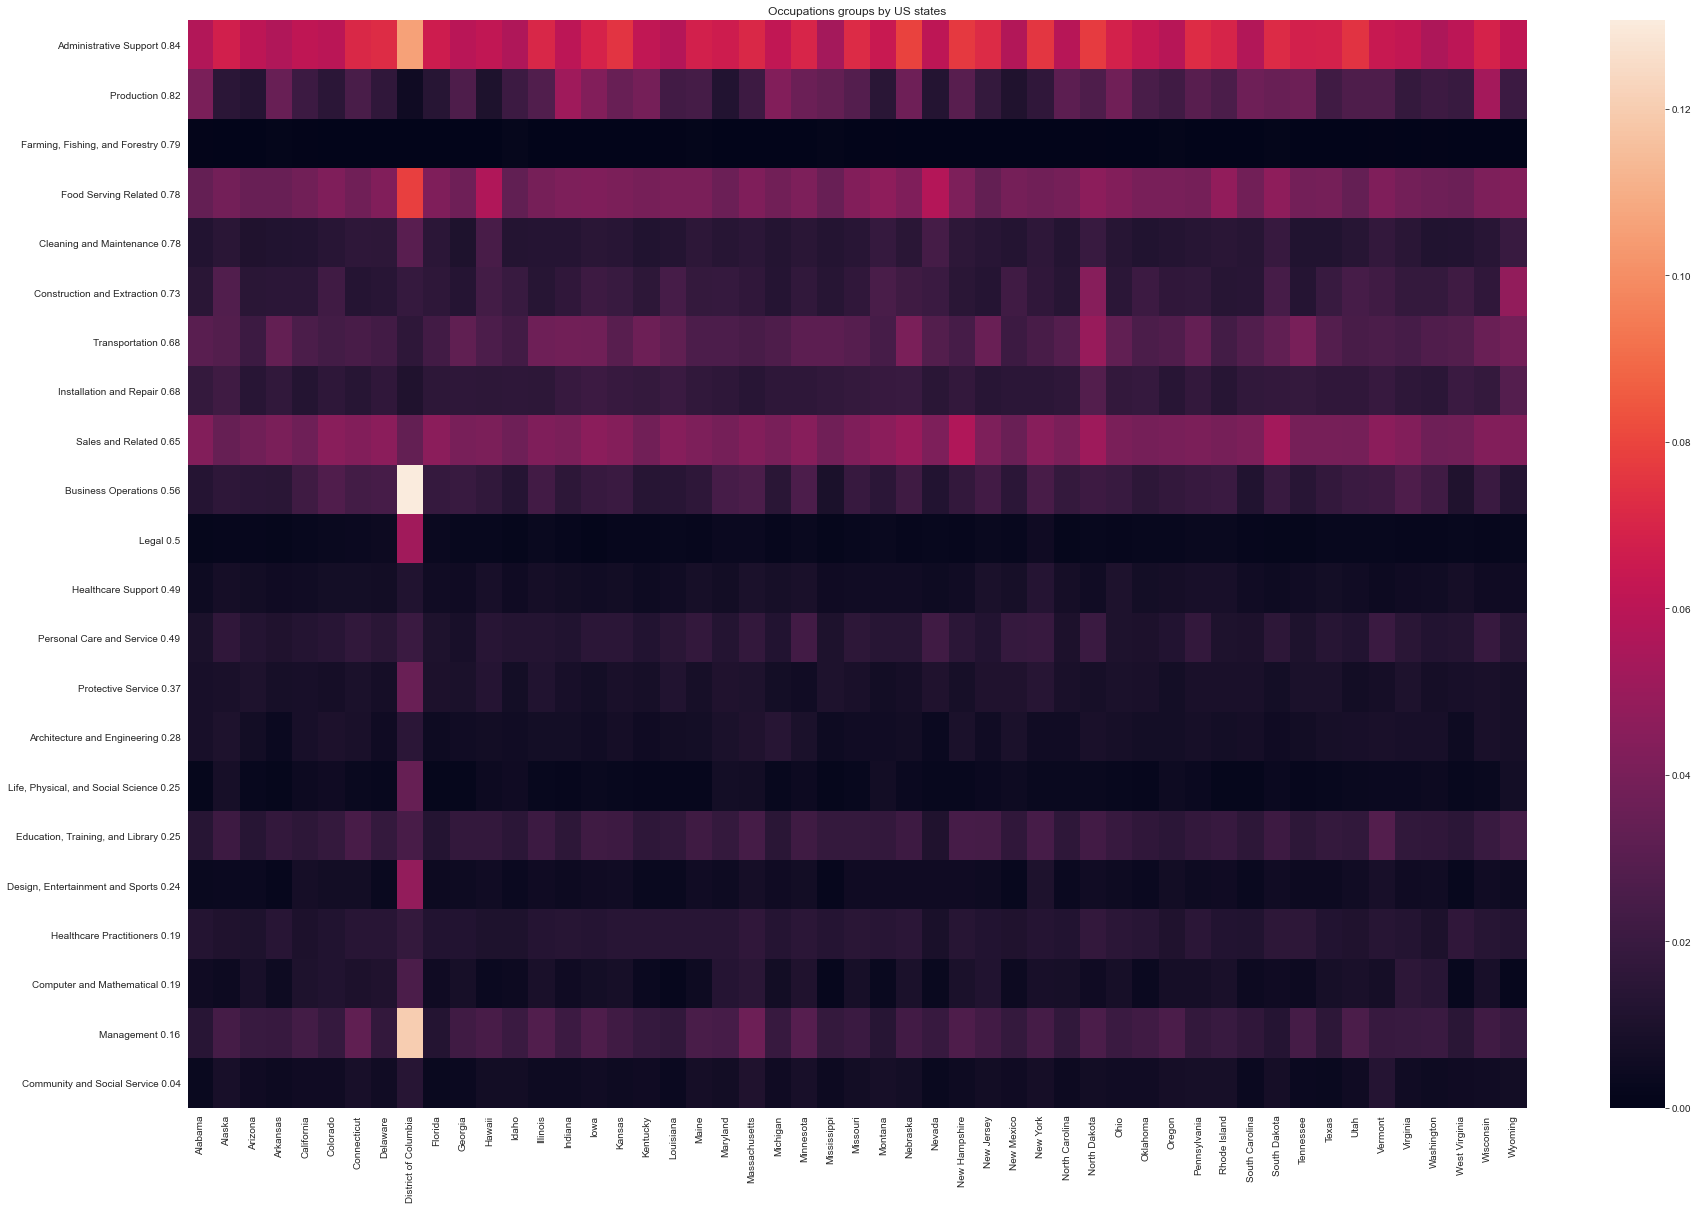

In [24]:
sns.set_style("dark")
plt.figure(figsize=(30,20))
plt.title("Occupations groups by US states")
sns.heatmap(data=Occupations_groups_plot[state_names]) 
# plt.xlabel("States")
plt.ylabel("")
sns.set(font_scale=4)
plt.savefig('All states Occupations groups and probability of automatisation.svg', bbox_inches="tight")
plt.show() 
# directory= 'img/'
# fig_name = '{}general_{}.png'.format(directory,indicator)
# plt.savefig(fname=fig_name, dpi=300,bbox_inches='tight')

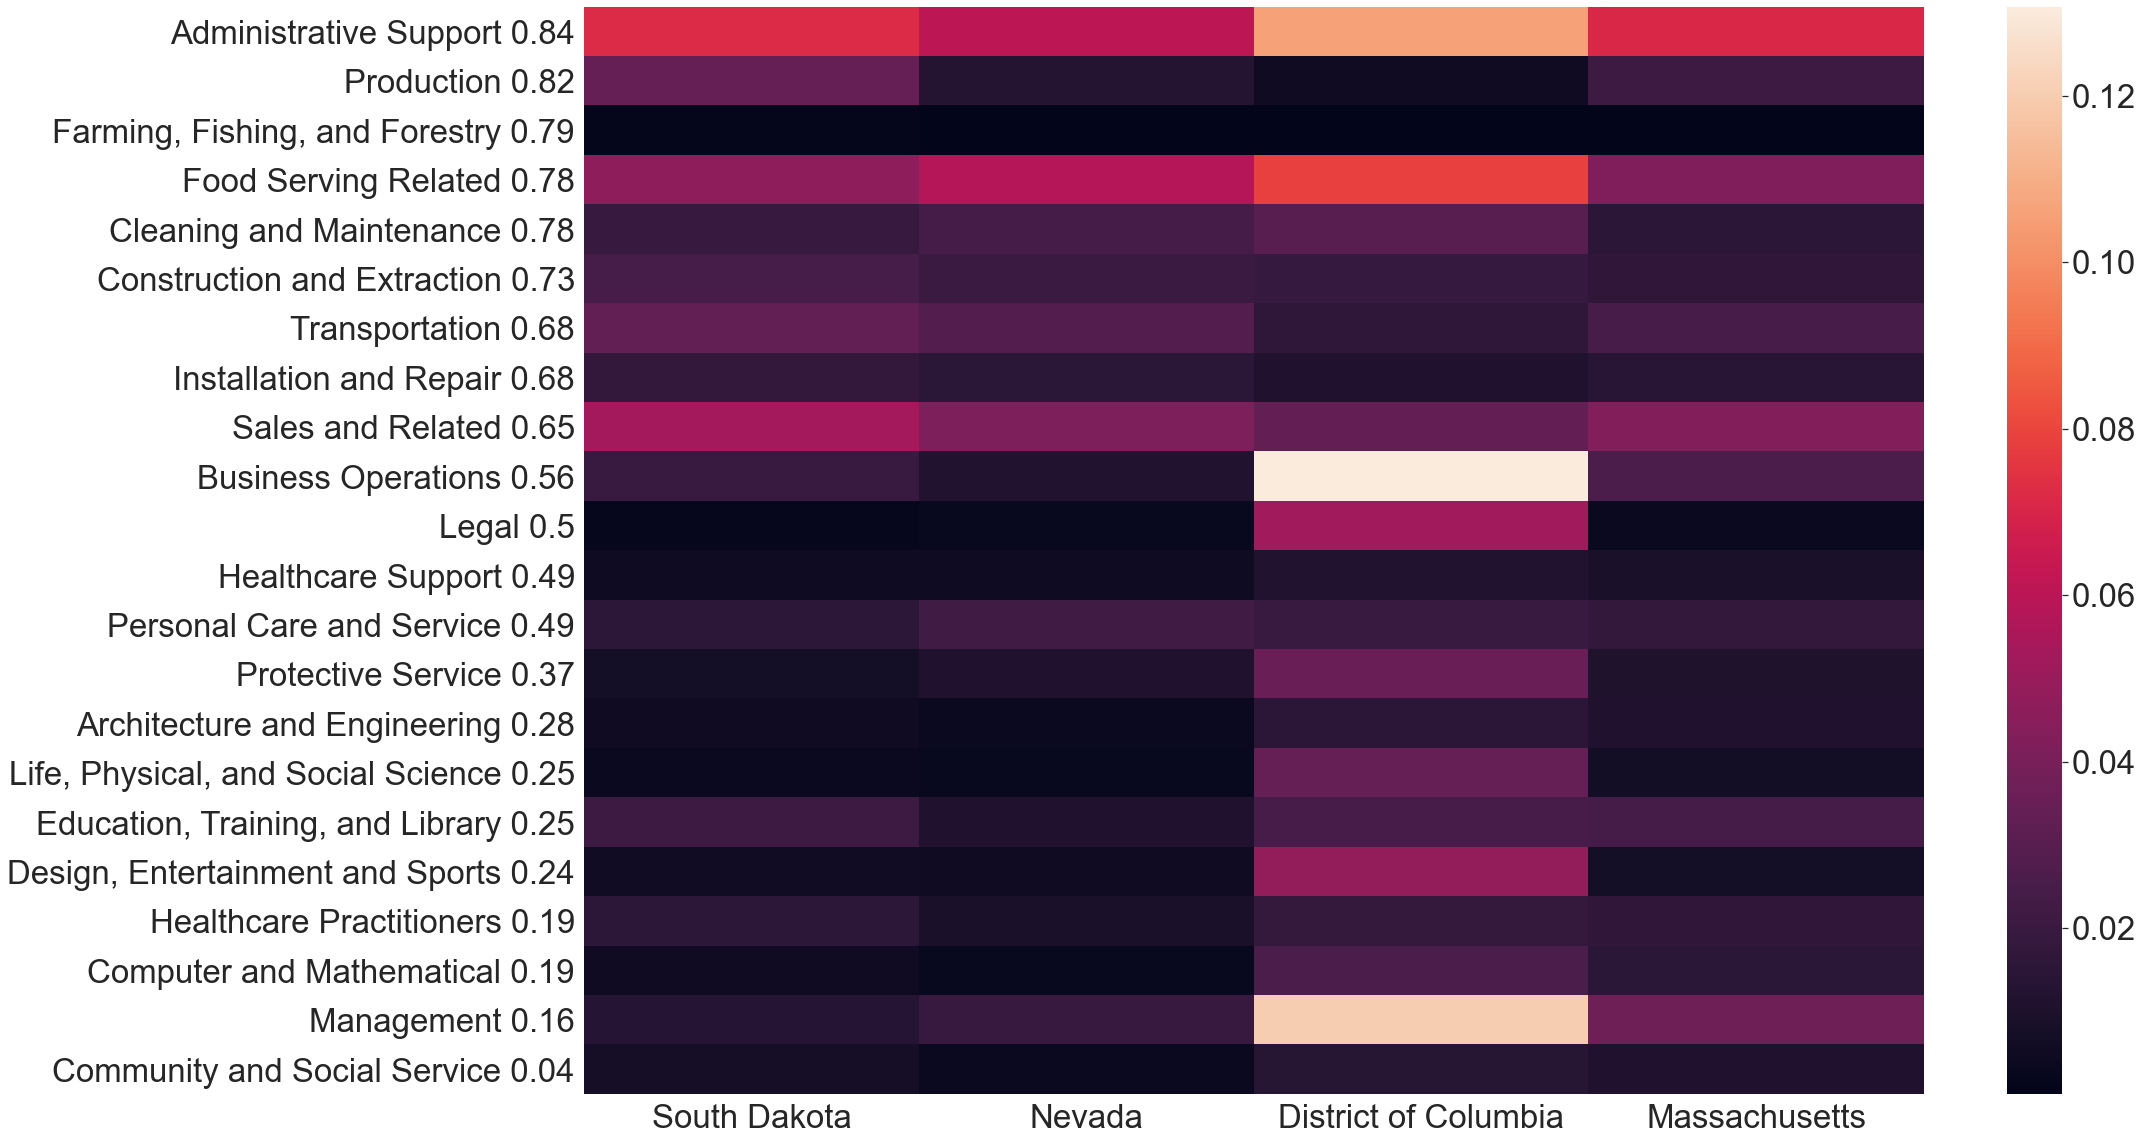

In [25]:
sns.set_style("dark")
plt.figure(figsize=(30,20))
# plt.title("Few states Occupations groups and probability of automatisation")
sns.set(font_scale=3)
sns.heatmap(data=Occupations_groups_plot[['South Dakota', 'Nevada', 'District of Columbia', 'Massachusetts']]) 
fig = plt.ylabel("")
plt.savefig('Few states Occupations groups and probability of automatisation.svg', bbox_inches="tight")
plt.show() 

5 occupations with highest probability for automatisation, and 5 with lowest probability for automatisation

In [26]:
A_data_prob_sort = A_data_clean.sort_values(by=['Probability'], ascending=False).reset_index()
A_head_clean = A_data_prob_sort.head()
A_tail_clean = A_data_prob_sort.tail()

A_data_highest_lowest_prob = pd.concat([A_head_clean, A_tail_clean])
A_data_highest_lowest_prob_present = A_data_highest_lowest_prob.drop(['level_0', 'index'], axis=1).set_index('Occupation')
A_data_highest_lowest_prob_present

,SOC,Probability,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Occupation,,,,,,,,,,,,,,,,,,,,,
Insurance Underwriters,13-2053,0.9900,960,120,1470,200,7440,1390,3160,200,...,270,880,5660,460,190,2280,1970,170,2290,90
Library Technicians,25-4031,0.9900,830,260,1430,400,10190,2460,1650,260,...,650,1340,3740,560,550,2290,2870,320,2520,440
Mathematical Technicians,15-2091,0.9900,0,0,0,0,0,0,0,0,...,0,0,110,0,0,0,0,0,0,0
New Accounts Clerks,43-4141,0.9900,430,50,900,450,3850,480,90,200,...,40,950,4280,350,0,980,630,320,1160,170
Sewers; Hand,51-6051,0.9900,110,0,0,0,1820,0,0,0,...,0,0,880,0,0,50,30,0,0,0
Audiologists,29-1181,0.0033,70,0,290,60,880,290,90,50,...,0,320,970,150,0,360,420,110,160,0
Mental Health and Substance Abuse Social Workers,21-1023,0.0031,1150,460,2510,830,12850,1770,2030,420,...,290,1630,3310,1130,980,4210,2300,190,1520,130
First-Line Supervisors of Mechanics; Installers; and Repairers,49-1011,0.0030,8150,1140,10410,4890,39910,7340,4180,1570,...,930,10630,38300,4330,1170,13860,10490,3220,8380,1740
Emergency Management Directors,11-9161,0.0030,180,70,140,130,900,130,130,0,...,90,140,480,130,0,440,150,70,170,40


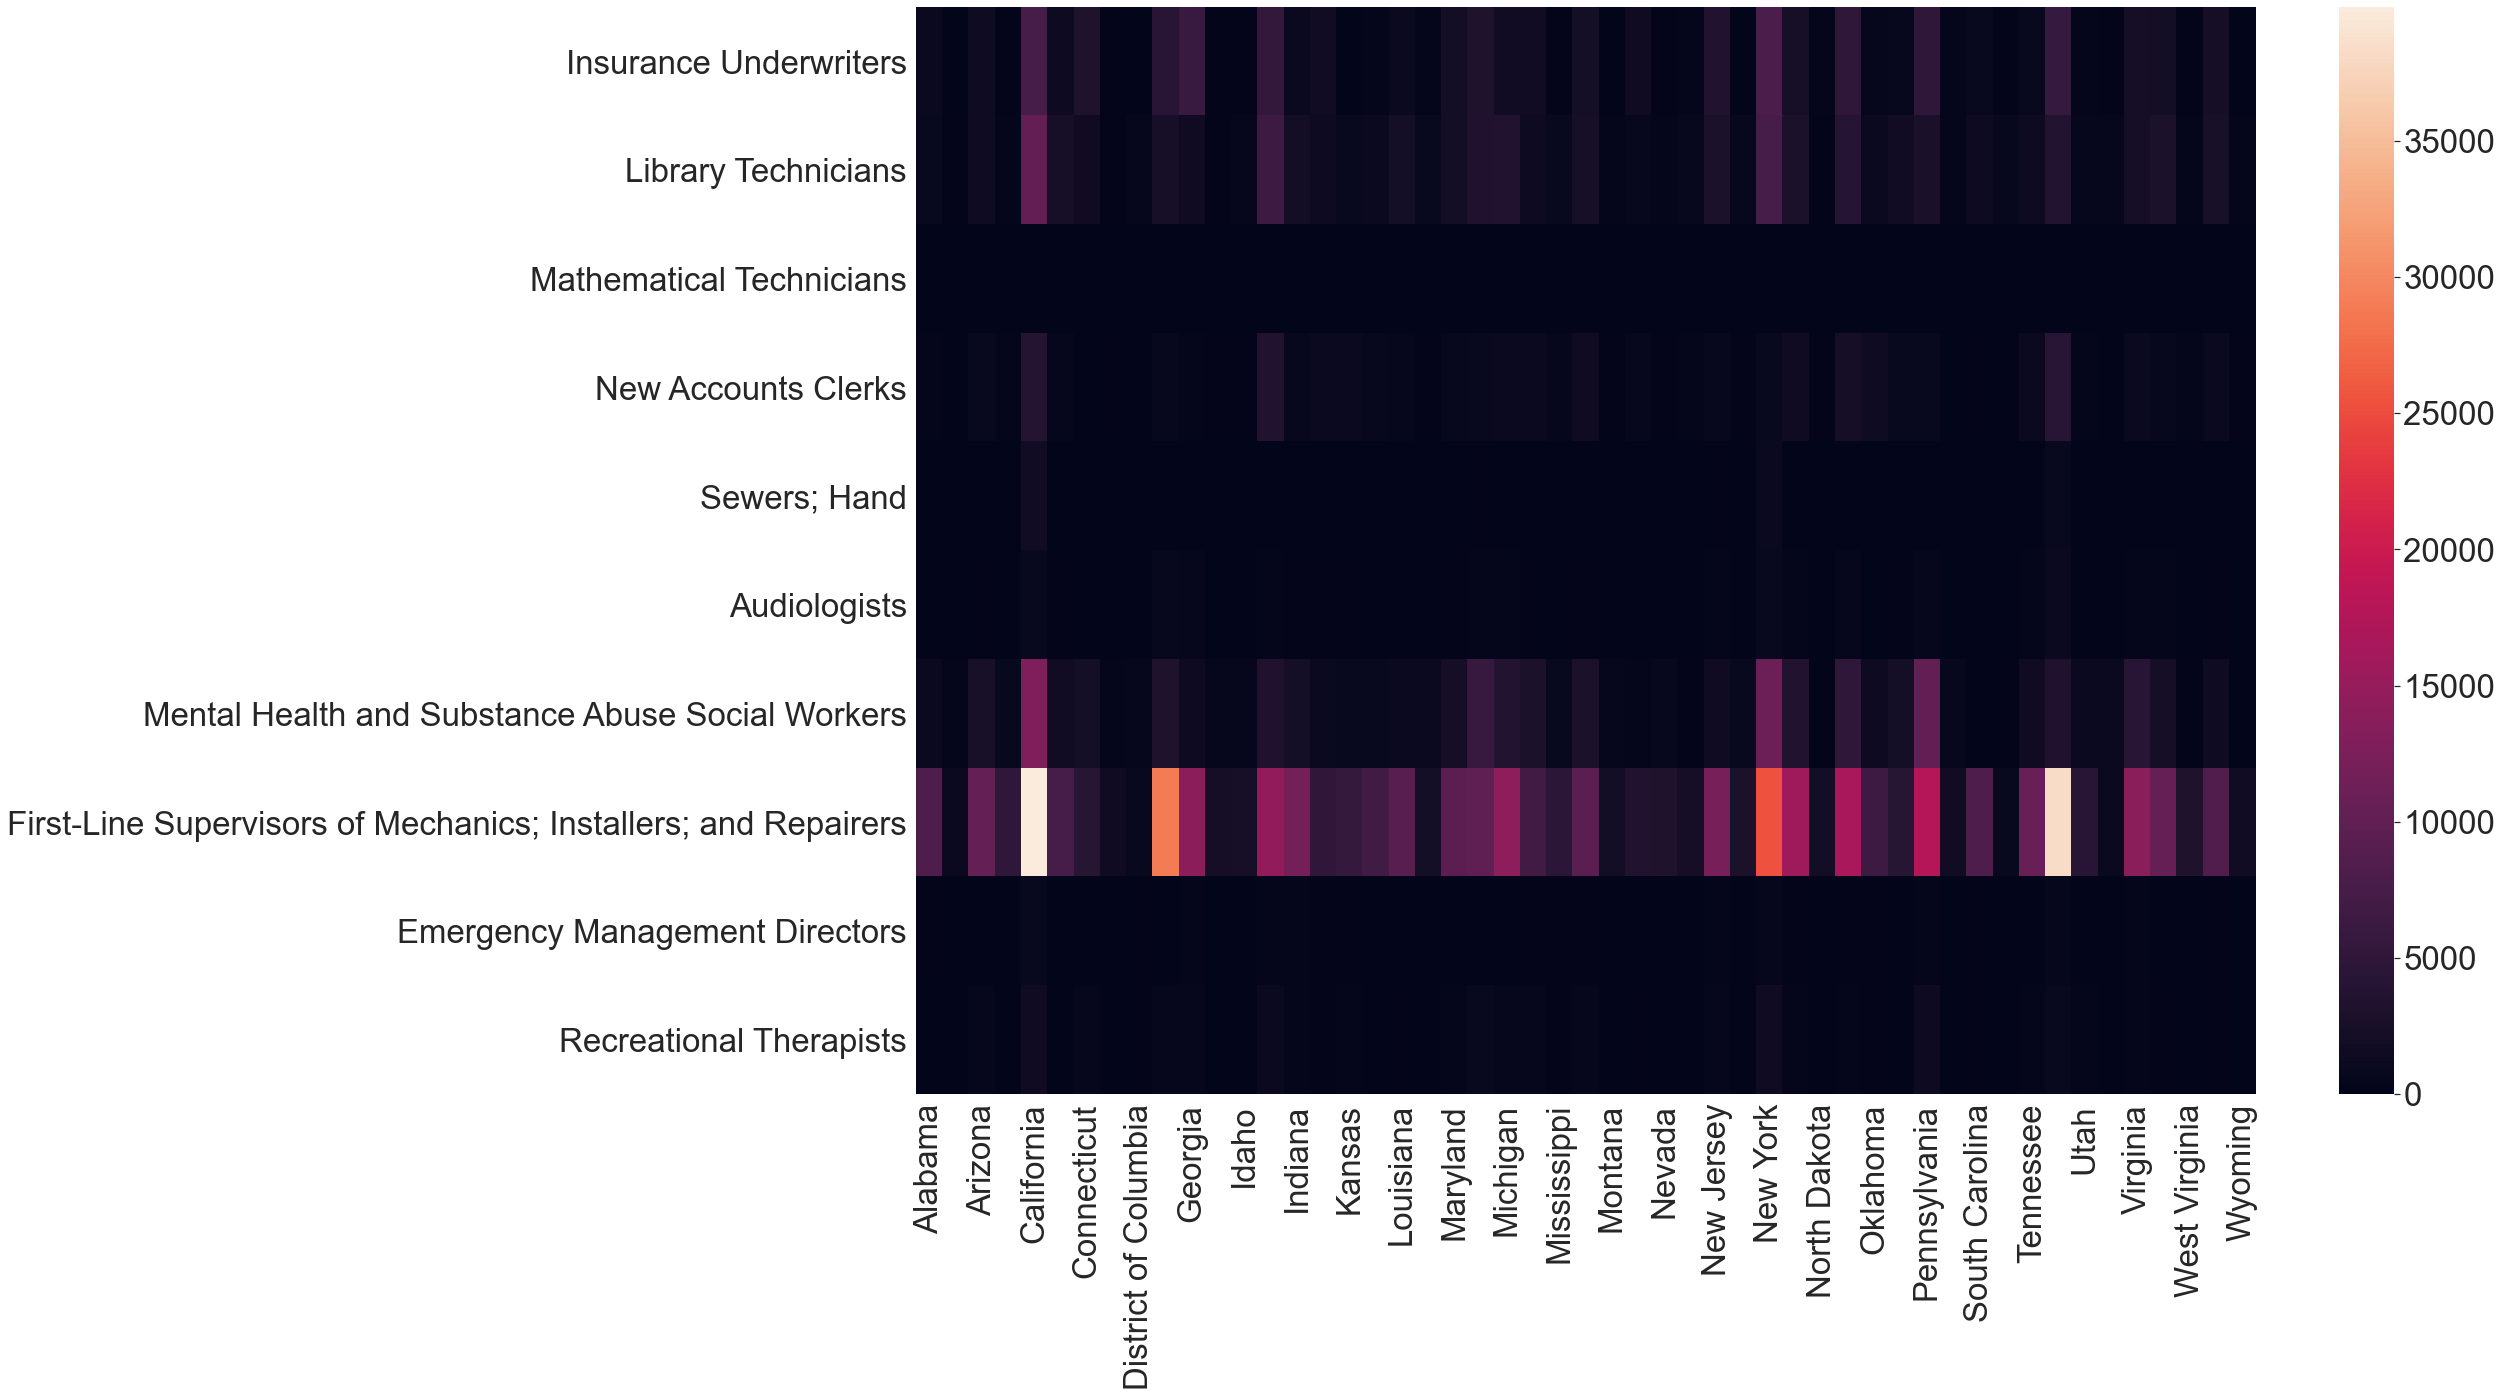

In [27]:
sns.set_style("darkgrid")
plt.figure(figsize=(30,20))
# plt.title("Occupations by US states")
sns.heatmap(data=A_data_highest_lowest_prob_present[state_names]) 
# plt.xlabel("States")
plt.ylabel("")
sns.set(font_scale=4)
plt.savefig('The safest and the most dangerous occupations for automatisation.svg', bbox_inches="tight")
plt.show() 

In [28]:
common_US_work = US_work.reset_index().drop(['level_0', 'index'], axis=1)

US occupations number ant accupations probabilities distribution

Check, what is propabilities distribution

In [29]:
US_work

,index,Occupation,Probability,US_workers
354,368,Retail Salespersons,0.92,4528570
350,364,Cashiers,0.97,3540980
304,317,Combined Food Preparation and Serving Workers;...,0.92,3426090
416,430,Office Clerks; General,0.96,2955560
382,396,Customer Service Representatives,0.55,2707030
...,...,...,...,...
594,612,Model Makers; Wood,0.96,280
71,75,Mathematical Technicians,0.99,220
542,560,Timing Device Assemblers and Adjusters,0.98,130
424,439,Fishers and Related Fishing Workers,0.83,40


Occupations with highest anf lowest automation probabilities

In [30]:
A_prob_sort = US_work.sort_values(by=['Probability'], ascending=False).reset_index()
A_head = A_prob_sort.head()
A_tail = A_prob_sort.tail()

highest_lowest_prob = pd.concat([A_head, A_tail])
highest_lowest_prob_present = highest_lowest_prob.drop(['level_0', 'index'], axis=1)
highest_lowest_prob_present

,Occupation,Probability,US_workers
0,Tax Preparers,0.9900,63600
1,Mathematical Technicians,0.9900,220
2,Data Entry Keyers,0.9900,193890
3,Sewers; Hand,0.9900,5170
4,Library Technicians,0.9900,93400
678,Audiologists,0.0033,11830
679,Mental Health and Substance Abuse Social Workers,0.0031,111370
680,Emergency Management Directors,0.0030,9540
681,First-Line Supervisors of Mechanics; Installer...,0.0030,453360
682,Recreational Therapists,0.0028,18080


# US occupations numbers and Occupations automatisation probabilities distribution

C:\Users\marij\anaconda3\lib\site-packages\seaborn\axisgrid.py:1734: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


<Figure size 1440x1440 with 0 Axes>

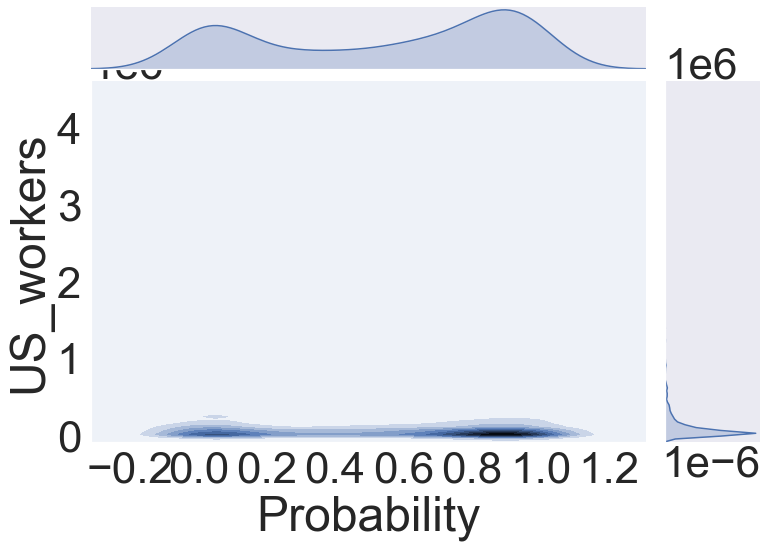

In [31]:
# plt.title("US workers numbers and Occupations automatisation probabilities distribution")
sns.set_style("dark")
plt.figure(figsize=(20,20))
fig = sns.jointplot(x=US_work['Probability'], y=US_work['US_workers'], kind="kde")
# plt.ylabel("Occupations numbers")
sns.set(font_scale=1.2)
# ax.set_ylim(1,31)
# ax.set_yticks(range(1,32))
# g.despine(bottom=True, left=True)
plt.gcf().set_size_inches(12, 8)
plt.show() 

In [32]:
US_sort_probability = US_work.sort_values(by=['Probability'], ascending=False).reset_index().drop(['level_0', 'index'], axis=1)
# US_sort_probability

Probability higher than 0.7  representing a "high risk category, meaning that associated occupations are potentially automatable over some unspecified number of years, perhaps a decade or two" according to the original research paper. We can look to this probability as to a time frame, where higher propabilty occupations are likely to be automated sooner.

The lost work positions and state population ratio. I take lost work position, when work automation probability ir equal to 0.7 or higher (threshhold >= 0.7).

In [33]:
threshhold = 0.7 # accupations automation probability threshhold

# Total number of jobs positions per state

I estimated, that these total job numbers are about 10%, due to jabs position not included. I got data with all jobs where data was not available or there were less than 10 employees were marked as zero.

In [34]:
p = A_data_clean.sort_values(by=['Probability'], ascending=False)
sum_work_per_state = p[state_names].sum()
States_sum_DF = pd.DataFrame({'States':sum_work_per_state.index, 'sum_work_positions':sum_work_per_state.values})
States_sum_sort =  States_sum_DF.sort_values(by=['sum_work_positions'], ascending=False)

Text(0.5, 0, 'Number of jobs positions')

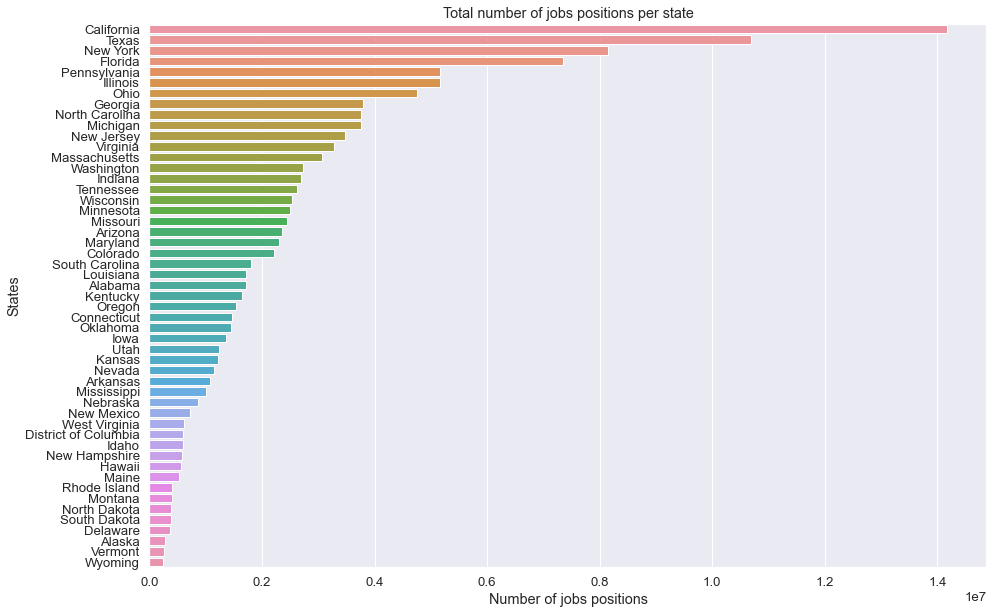

In [35]:
plt.figure(figsize=(15,10))
sns.barplot(y=States_sum_sort['States'], x=States_sum_sort['sum_work_positions'])
plt.title("Total number of jobs positions per state")
plt.xlabel("Number of jobs positions")

# Plot second bar to every state - left absolute occupation positions when threshhold < 0.7.

In [36]:
p_index = p.reset_index().drop(['level_0', 'index', 'SOC'], axis=1)
p05 = p_index.loc[(p_index.Probability < threshhold)]

In [37]:
sum_work_per_state05 = p05[state_names].sum()
States_sum_DF05 = pd.DataFrame({'States':sum_work_per_state05.index, 'sum_work_positions':sum_work_per_state05.values})
States_sum_sort05 =  States_sum_DF05.sort_values(by=['sum_work_positions'], ascending=False)
States_sum_sort05.head()

,States,sum_work_positions
4,California,6902430
43,Texas,4934090
32,New York,4190980
9,Florida,3367580
13,Illinois,2581770


Text(0.5, 0, 'Number of jobs positions')

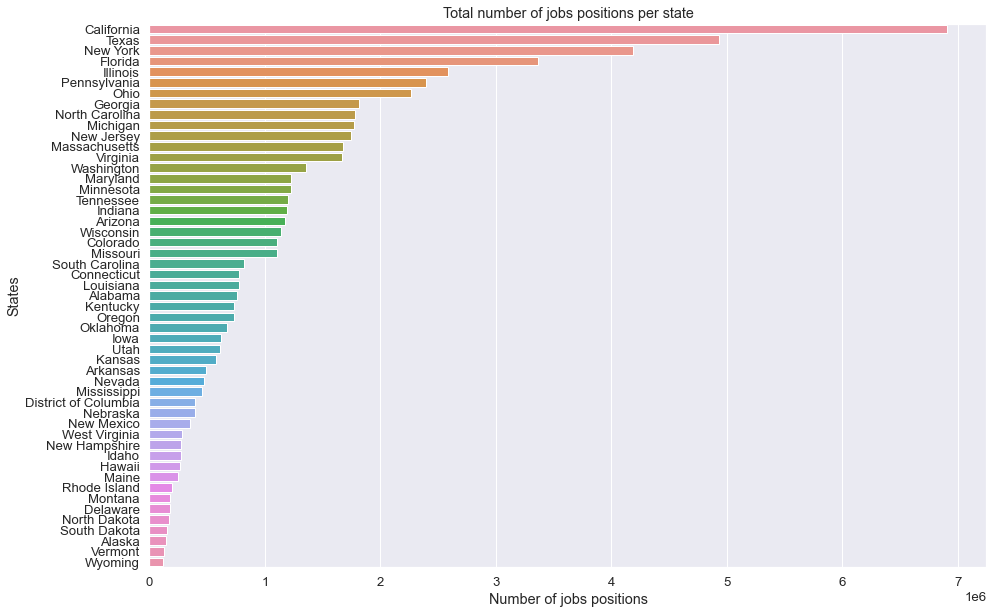

In [38]:
plt.figure(figsize=(15,10))
sns.barplot(y=States_sum_sort05['States'], x=States_sum_sort05['sum_work_positions'])
plt.title("Total number of jobs positions per state")
plt.xlabel("Number of jobs positions")

# How many jobs positions would be lost in States, if we lost accupations which have automation probability equal to 0.7 or higher.

In [39]:
States_sum_DF['Threshhold'] = 1.0
States_sum_DF05['Threshhold'] = threshhold
States_sum_DF05.head()

,States,sum_work_positions,Threshhold
0,Alabama,754110,0.7
1,Alaska,139940,0.7
2,Arizona,1169740,0.7
3,Arkansas,492410,0.7
4,California,6902430,0.7


In [40]:
Compare_sums = pd.concat([States_sum_DF, States_sum_DF05])
Compare_sums_sort = Compare_sums.sort_values(by=['sum_work_positions'], ascending=False)
Compare_sums_sort

,States,sum_work_positions,Threshhold
4,California,14163090,1.0
43,Texas,10685220,1.0
32,New York,8149510,1.0
9,Florida,7349340,1.0
4,California,6902430,0.7
...,...,...,...
34,North Dakota,173290,0.7
41,South Dakota,156030,0.7
1,Alaska,139940,0.7
45,Vermont,127450,0.7


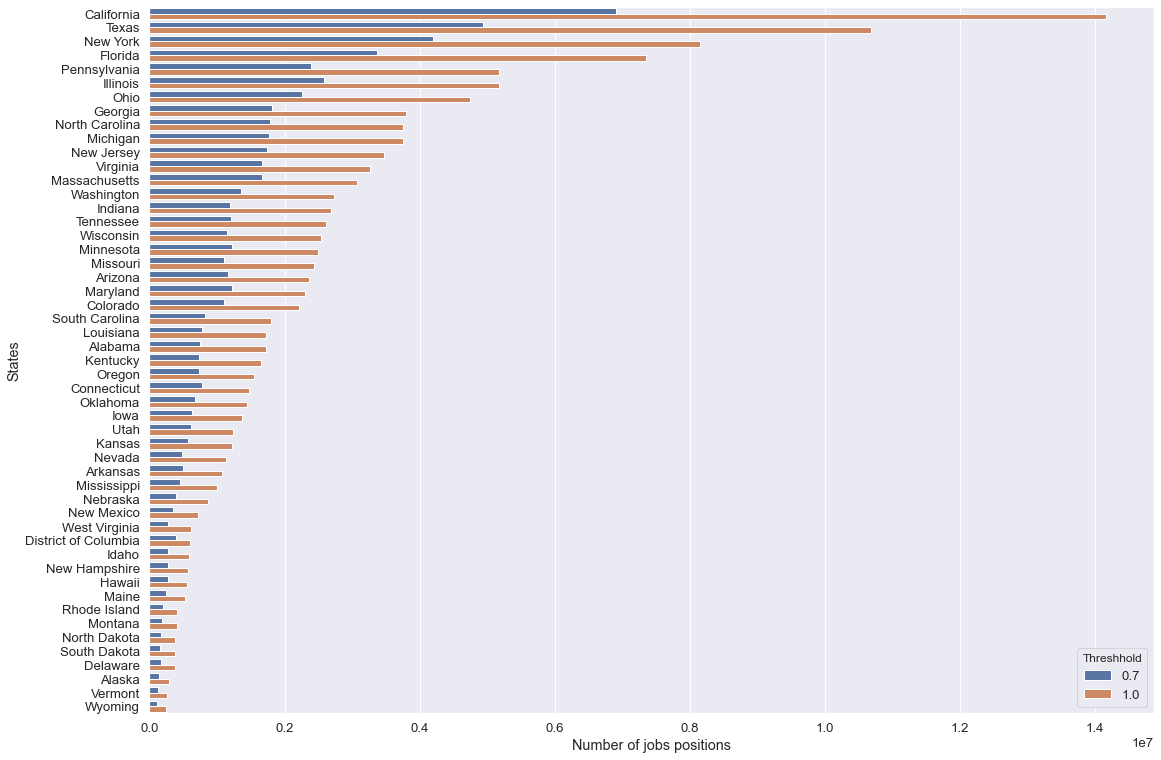

In [41]:
plt.figure(figsize=(18,13))
sns.set_style("darkgrid")
sns.barplot(y=Compare_sums_sort['States'], x=Compare_sums_sort['sum_work_positions'], hue='Threshhold', data=Compare_sums_sort)#, kind='bar')
sns.set(font_scale=1.5)
# plt.title("Total number of jobs positions per state now (Threshhold=1.0) and when higher automatisation probability accuaptions lost (Threshhold=threshhold)")
plt.xlabel("Number of jobs positions")
plt.savefig('Probabilities 1 and 07.svg', bbox_inches="tight")
plt.show()

Lets look, what are reliative loss numbers

In [42]:
States_sum_join = States_sum_DF.join(States_sum_DF05, lsuffix='1.0', rsuffix='0.5')
States_sum_drop = States_sum_join.drop(['Threshhold1.0', 'States0.5', 'Threshhold0.5'], axis=1)
Relative_jobs_drop = ((States_sum_drop['sum_work_positions1.0']-States_sum_drop['sum_work_positions0.5'])/States_sum_drop['sum_work_positions1.0'])*100
States_sum_drop.head()

,States1.0,sum_work_positions1.0,sum_work_positions0.5
0,Alabama,1722020,754110
1,Alaska,284920,139940
2,Arizona,2355040,1169740
3,Arkansas,1070380,492410
4,California,14163090,6902430


In [43]:
Relative_jobs_drop_DF = pd.DataFrame({'Lost jobs ratio':Relative_jobs_drop.values})
Relative_jobs_drop_States = States_sum_drop.join(Relative_jobs_drop_DF)
Relative_jobs_drop_States_sort = Relative_jobs_drop_States.sort_values(by=['sum_work_positions1.0'], ascending=False)
Relative_jobs_drop_mean = Relative_jobs_drop_States_sort['Lost jobs ratio'].mean()
Relative_jobs_drop_mean

52.296073277430494

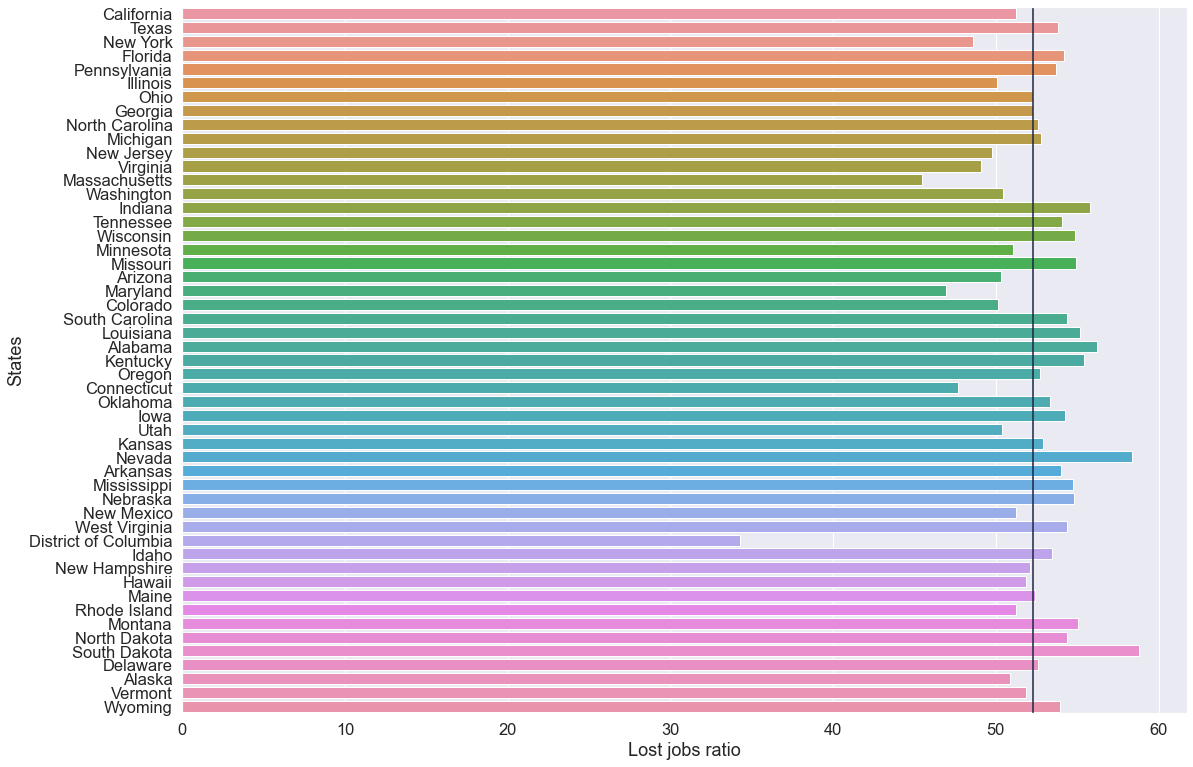

In [44]:
sns.set_palette("cubehelix")
plt.figure(figsize=(18,13))
graph = sns.barplot(y=Relative_jobs_drop_States_sort['States1.0'], x=Relative_jobs_drop_States_sort['Lost jobs ratio'])#, hue='Threshhold', data=Compare_sums_sort)#, kind='bar')
# plt.title("Lost jobs ratio per state when we lost jobs with automatisation probability equal to 0.5 (Threshhold) or higher")
plt.xlabel("Lost jobs ratio")
plt.ylabel("States")
graph.axvline(Relative_jobs_drop_mean)
plt.savefig('Lost jobs ratio per state.svg', bbox_inches="tight")
plt.show()

In [45]:
Relative_jobs_drop_States_highest = Relative_jobs_drop_States.sort_values(by=['Lost jobs ratio'], ascending=False)

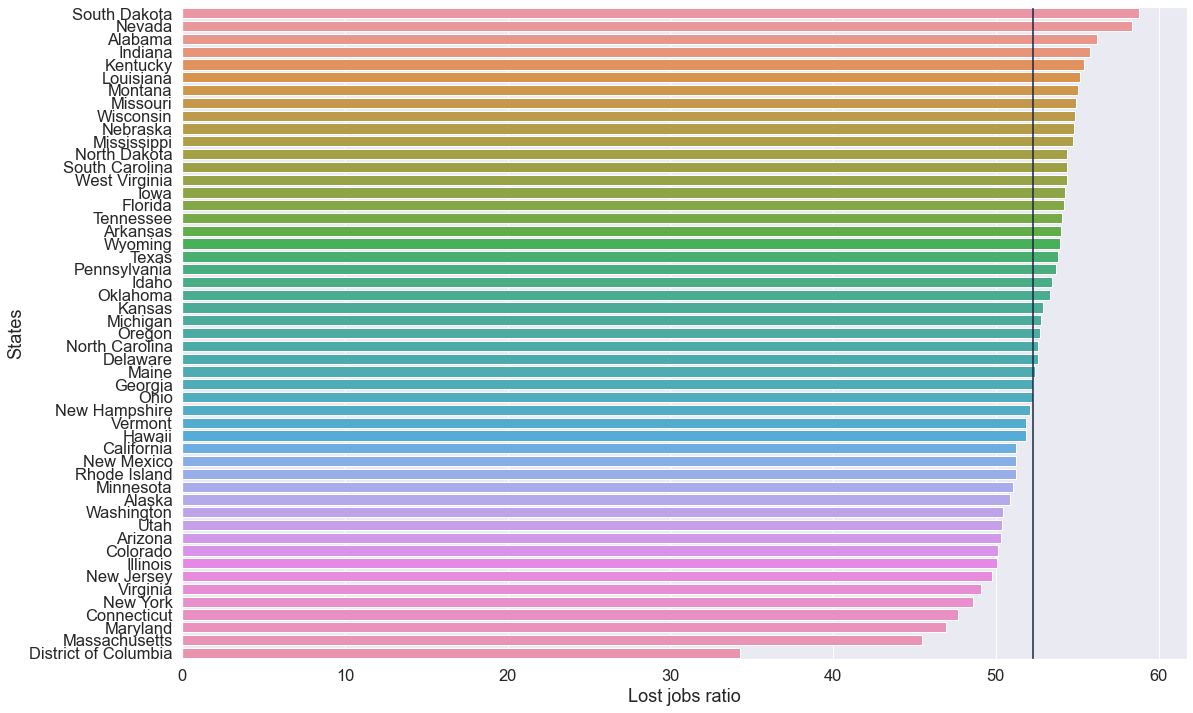

In [46]:
sns.set_palette("cubehelix")
plt.figure(figsize=(18,12))
graph = sns.barplot(y=Relative_jobs_drop_States_highest['States1.0'], x=Relative_jobs_drop_States_highest['Lost jobs ratio'])#, hue='Threshhold', data=Compare_sums_sort)#, kind='bar')
# plt.title("Lost jobs ratio per state when we lost jobs with automatisation probability equal to 0.5 (Threshhold) or higher")
plt.xlabel("Lost jobs ratio")
plt.ylabel("States")
graph.axvline(Relative_jobs_drop_mean)
plt.savefig('Lost jobs ratio sorted.svg', bbox_inches="tight")
plt.show()

# South Dakota and Nevada have most jobs losses. Lets look, what are biggest occupations they lost

Let's start with Nevada data

In [47]:
nevada = A_data_clean[['Occupation', 'Probability', 'South Dakota', 'Nevada']].sort_values(by=['Probability'], ascending=False)
nevada07_full = nevada.loc[(nevada.Probability >= threshhold)].sort_values(by=['Nevada'], ascending=False).reset_index()
nevada07 = nevada07_full.head(9)
nevada07_tail = nevada07_full.tail(308).Nevada.sum()
df2 = {'Occupation': 'Other', 'Probability': 0, 'South Dakota': 0, 'Nevada': nevada07_tail} 
nevada07 = nevada07.append(df2, ignore_index = True) 
nevada07

,index,Occupation,Probability,South Dakota,Nevada
0,354.0,Retail Salespersons,0.92,15500,49650
1,306.0,Waiters and Waitresses,0.94,7240,39450
2,350.0,Cashiers,0.97,13200,34490
3,304.0,Combined Food Preparation and Serving Workers;...,0.92,9390,30950
4,416.0,Office Clerks; General,0.96,3670,27320
5,674.0,Laborers and Freight; Stock; and Material Move...,0.85,7060,26770
6,324.0,Gaming Dealers,0.96,280,21500
7,292.0,Security Guards,0.84,1120,21230
8,300.0,Cooks; Restaurant,0.96,1830,20860
9,NaN,Other,0.00,0,414130


Plot pie chart of Nevada data

<ipython-input-48-fa567a5d8f23>:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


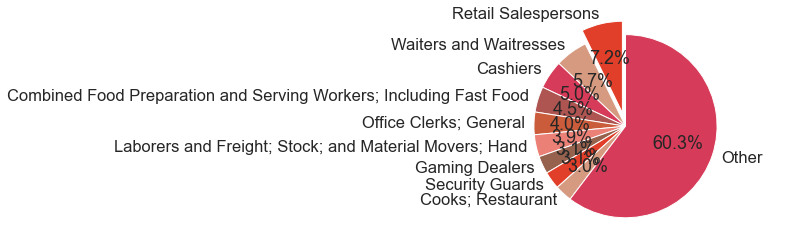

In [48]:
# Create a list of colors (from iWantHue)
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]

# Create a pie chart
plt.pie(
    # using data total)arrests
    nevada07['Nevada'],
    # with the labels being officer names
    labels=nevada07['Occupation'],
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=(0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )
# plt.title(label="Nevada states the bigest occuaptions", fontsize=20, loc="left", color="red")
sns.set(font_scale=1.3)
# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.savefig('Nevada pie.svg', bbox_inches="tight")
plt.show()

Now let's look to South Dakota

In [49]:
dakota = A_data_clean[['Occupation', 'Probability', 'South Dakota']].sort_values(by=['Probability'], ascending=False)
dakota07_full = dakota.loc[(dakota.Probability >= threshhold)].sort_values(by=['South Dakota'], ascending=False).reset_index()
dakota07 = dakota07_full.head(9)
dakota07_tail = dakota07_full.tail(308)['South Dakota'].sum()
df2 = {'Occupation': 'Other', 'Probability': 0, 'South Dakota': dakota07_tail} 
dakota07 = dakota07.append(df2, ignore_index = True) 
dakota07

,index,Occupation,Probability,South Dakota
0,354.0,Retail Salespersons,0.92,15500
1,350.0,Cashiers,0.97,13200
2,373.0,Bookkeeping; Accounting; and Auditing Clerks,0.98,9610
3,304.0,Combined Food Preparation and Serving Workers;...,0.92,9390
4,647.0,Heavy and Tractor-Trailer Truck Drivers,0.79,7770
5,306.0,Waiters and Waitresses,0.94,7240
6,674.0,Laborers and Freight; Stock; and Material Move...,0.85,7060
7,409.0,Secretaries and Administrative Assistants; Exc...,0.96,5840
8,360.0,Sales Representatives; Wholesale and Manufactu...,0.85,5390
9,NaN,Other,0.00,146890


Plot pie chart of South Dakota data

<ipython-input-50-6bd457702e29>:24: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


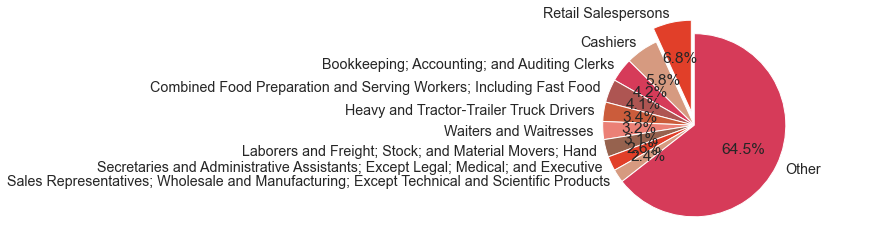

In [50]:
# Create a pie chart
plt.pie(
    # using data total)arrests
    dakota07['South Dakota'],
    # with the labels being officer names
    labels=dakota07['Occupation'],
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=(0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )
# plt.title(label="Nevada states the bigest occuaptions", fontsize=20, loc="left", color="red")
sns.set(font_scale=1.3)
# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.savefig('Dakota pie.svg', bbox_inches="tight")
plt.show()

District of Columbia has lowest sensitivity for automation. Let's check the data

In [51]:
DC = A_data_clean[['Occupation', 'Probability', 'District of Columbia']].sort_values(by=['Probability'], ascending=False)
DC07_full = DC.loc[(DC.Probability >= threshhold)].sort_values(by=['District of Columbia'], ascending=False).reset_index()
DC07 = DC07_full.head(9)
DC07_tail = DC07_full.tail(308)['District of Columbia'].sum()
df2 = {'Occupation': 'Other', 'Probability': 0, 'District of Columbia': DC07_tail} 
DC07 = DC07.append(df2, ignore_index = True) 
DC07

,index,Occupation,Probability,District of Columbia
0,292.0,Security Guards,0.84,15140
1,409.0,Secretaries and Administrative Assistants; Exc...,0.96,14720
2,47.0,Accountants and Auditors,0.94,11080
3,416.0,Office Clerks; General,0.96,10000
4,350.0,Cashiers,0.97,9270
5,304.0,Combined Food Preparation and Serving Workers;...,0.92,8750
6,306.0,Waiters and Waitresses,0.94,8720
7,354.0,Retail Salespersons,0.92,6500
8,300.0,Cooks; Restaurant,0.96,6200
9,NaN,Other,0.00,121160


District of Columbia pie chart

<ipython-input-52-0f557181b0cf>:24: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


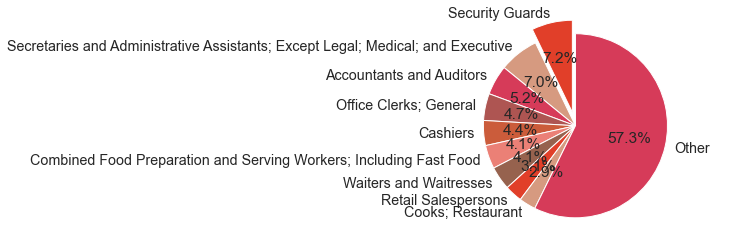

In [52]:
# Create a pie chart
plt.pie(
    # using data total)arrests
    DC07['District of Columbia'],
    # with the labels being officer names
    labels=DC07['Occupation'],
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=(0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )
# plt.title(label="Nevada states the bigest occuaptions", fontsize=20, loc="left", color="red")
sns.set(font_scale=1.3)
# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.savefig('District of Columbia pie.svg', bbox_inches="tight")
plt.show()

Massachusetts data

In [53]:
massachusetts = A_data_clean[['Occupation', 'Probability', 'Massachusetts']].sort_values(by=['Probability'], ascending=False)
massachusetts07_full = massachusetts.loc[(nevada.Probability >= threshhold)].sort_values(by=['Massachusetts'], ascending=False).reset_index()
massachusetts07 = massachusetts07_full.head(9)
massachusetts07_tail = massachusetts07_full.tail(308).Massachusetts.sum()
df2 = {'Occupation': 'Other', 'Probability': 0, 'Massachusetts': massachusetts07_tail} 
massachusetts07 = massachusetts07.append(df2, ignore_index = True) 
massachusetts07

,index,Occupation,Probability,Massachusetts
0,354.0,Retail Salespersons,0.92,107880
1,350.0,Cashiers,0.97,72200
2,416.0,Office Clerks; General,0.96,63080
3,306.0,Waiters and Waitresses,0.94,61350
4,304.0,Combined Food Preparation and Serving Workers;...,0.92,57700
5,409.0,Secretaries and Administrative Assistants; Exc...,0.96,43310
6,373.0,Bookkeeping; Accounting; and Auditing Clerks,0.98,42930
7,344.0,Personal Care Aides,0.74,42190
8,674.0,Laborers and Freight; Stock; and Material Move...,0.85,36350
9,NaN,Other,0.00,905140


Massachusetts pie chart**

<ipython-input-54-b7e8ec9caa8a>:24: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


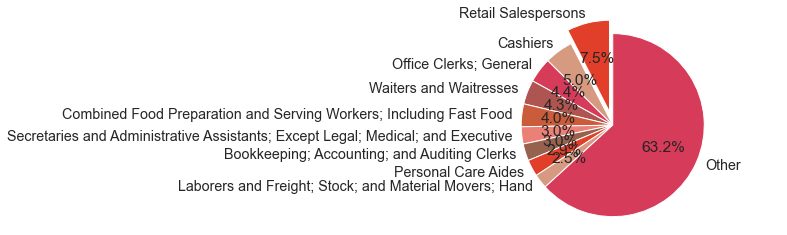

In [54]:
# Create a pie chart
plt.pie(
    # using data total)arrests
    massachusetts07['Massachusetts'],
    # with the labels being officer names
    labels=massachusetts07['Occupation'],
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=(0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )
# plt.title(label="Nevada states the bigest occuaptions", fontsize=20, loc="left", color="red")
sns.set(font_scale=1.3)
# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.savefig('Massachusetts pie.svg', bbox_inches="tight")
plt.show()

# Conclusions

1. The most robust occupations for automatisations: Saugiausios specialybės nuo automatizacijos: social service, management, computer and mathematical and medicine. The most sensitive: administrative support, production, farming, fishing, forestry, food serving related.
2. A bit more occupations have higher probability for automatisation
3. US would loss around half of all jobs, if automatisation take out occupations with automatisation probability equal to 0.7 or higher?
4. South Dakota and nevada are the most sensitive and District of Columbia and Massachusetts are the most robust to automatisation.
5. Nevada and South Dakota have most occupations with high probability for automation. District od Columbia also has many occupations with low probability for automatisation like management, arts and protective service